In [1]:
import pandas as pd
import numpy as np
import random as rd
import scipy.stats as stats
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import date, timedelta
from random import choices
import random

pd.set_option('display.max_columns', None)
# Set random seed for reproducibility
np.random.seed(888)

In [ ]:
# Initalising the DataFrame 
s = pd.read_csv("../../data/raw/loan_data_train.csv")
df = pd.DataFrame( 
    columns = ['loan_id', 
              'customer_id', 
              'loan_amount',
              'loan_purpose',
              'due_date',
              'paid_off_date',
              ])
df

,loan_id,customer_id,loan_amount,loan_purpose,due_date,paid_off_date


In [3]:
# Only extracting the loan purpose and loan amount variables
s = s[['Loan.Purpose', 'Amount.Requested']]

# Merging some values together and removing confusing values and dropping nans
cond = s['Loan.Purpose'].isin(['house', 'moving', 'home_improvement'])
s['Loan.Purpose'].mask(cond, 'housing-related', inplace=True)
s['Loan.Purpose'].replace('renewable_energy', np.nan, inplace=True)
s.dropna(inplace=True)
s.loc[s[s['Amount.Requested'] == '.'].index, 'Amount.Requested'] = np.nan
s['Amount.Requested'] = s['Amount.Requested'].astype('float64')

loan_purpose = s['Loan.Purpose']
loan_amount = s['Amount.Requested']

In [4]:
# Sequentially generate load_ids from 1 to 4000 and mutliplying by 3
a = random.sample([i for i in range(1, 4001)], k=int(4000 * 0.66))
a = a + a + a 
df.customer_id = a

In [5]:
# Generating the due date 
indicies = len(df.customer_id)

test_date1, test_date2 = date(2026, 1, 1), date(2027, 12, 31)
K = indicies
res_dates = [test_date1]
while test_date1 != test_date2:
    test_date1 += timedelta(days=1)
    res_dates.append(test_date1)
res = choices(res_dates, k=K)

df.due_date = res

# Generating the paid off date
indicies = len(df.customer_id)

test_date1, test_date2 = date(2024, 1, 1), date(2024, 12, 31)
K = indicies
res_dates = [test_date1]
while test_date1 != test_date2:
    test_date1 += timedelta(days=1)
    res_dates.append(test_date1)
res = choices(res_dates, k=K)

df.paid_off_date = res

In [6]:
# Randomly replacing the paid off date with NaNs
unique_cust = df.customer_id.unique()
indicies = random.sample(list(unique_cust), k=int(len(unique_cust)*0.6))
df.loc[indicies, 'paid_off_date'] = np.nan

# Generating the loan id
df.loan_id = [i for i in range(1, 7921)]

loan_purpose = random.choices(list(loan_purpose), k=7920)
loan_amount = random.choices(list(loan_amount), k=7920)

In [7]:
df.loan_amount = loan_amount
df.loan_purpose = loan_purpose

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'debt_consolidation'),
  Text(1, 0, 'credit_card'),
  Text(2, 0, 'medical'),
  Text(3, 0, 'major_purchase'),
  Text(4, 0, 'other'),
  Text(5, 0, 'small_business'),
  Text(6, 0, 'housing-related'),
  Text(7, 0, 'car'),
  Text(8, 0, 'wedding'),
  Text(9, 0, 'vacation'),
  Text(10, 0, 'educational')])

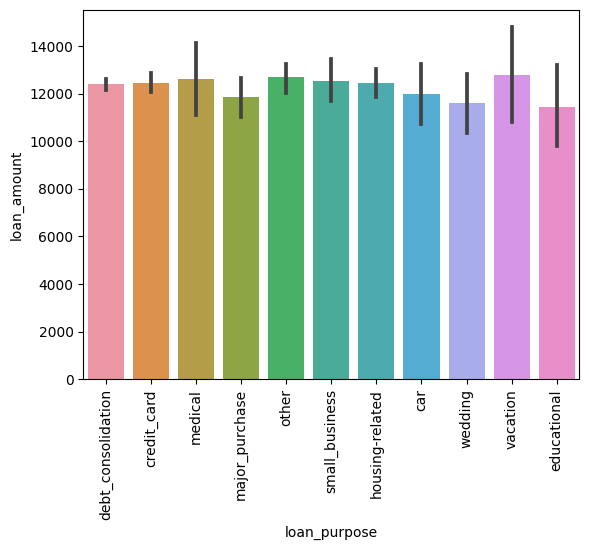

In [8]:
sns.barplot(data=df, x='loan_purpose', y='loan_amount')
plt.xticks(rotation=90)

In [9]:
df.to_csv("../../data/processed/loans.csv")